In [1]:
import tensorflow as tf
import numpy as np
import tensorflow_probability as tfp
import os 
import sys
import matplotlib.pyplot as plt
import pandas as pd
%load_ext autoreload
%autoreload 2


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [2]:
data = pd.read_csv('../test_Data/training_data2.csv').values

In [3]:
tfm = tfp.models

In [4]:
Xtr = data[:,:-1]
Ytr = data[:,-1]

In [5]:
# initialize
bgp = tfm.BGP_model(Xtr, Ytr, 'Matern32', 1e-4)

In [6]:
# perform mcmc sampling
bgp.run_mcmc(5000,  num_leapfrog_steps = 3, estimate_noise = False, warm_up = True)

Noise variance is fixed.
Excecuting the warmup.
Warmup: 
Step  0
Step  500
Step  1000
Step  1500
Step  2000
Time per step in warm up:  0.00397773208618164
Sampling in progress.


W0206 22:53:17.091755 140456430118656 deprecation.py:323] From /root/.local/lib/python3.5/site-packages/tensorflow_probability/python/models/bhge_bayesianGP/scripts/bayesiangp.py:365: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Acceptance rate of the HMC sampling: 0.803


In [8]:
# plot the samples from the mcmc sampling
bgp.plot_chains(display = False)

In [9]:
# get predictions on training data
mean_pos, std_pos, samples = bgp.predict(Xtr, with_point_samples = True)

# Computing percentiles
lower = np.percentile(samples,2.5, axis = 0)
upper = np.percentile(samples,97.5, axis = 0)


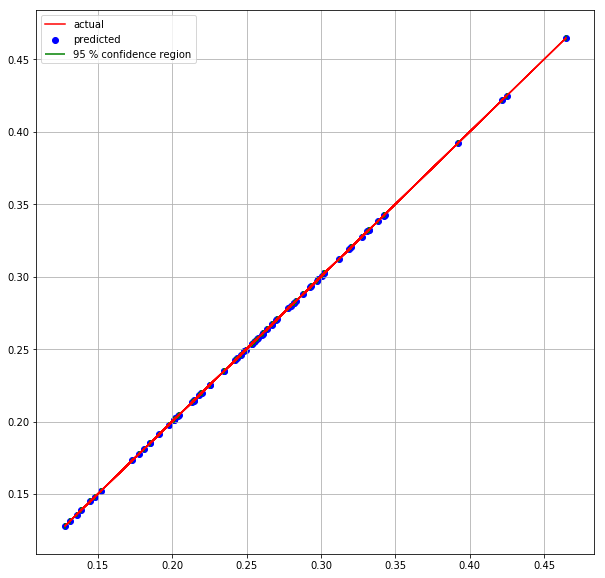

In [10]:
# generating predicted vs actual plot
# Predicted vs actual
plt.figure(figsize =(10,10))
plt.plot(Ytr, Ytr, color = 'red', label ='actual')
plt.scatter(Ytr, mean_pos, color = 'blue', label = 'predicted')
plt.vlines(Ytr, lower, upper, color = 'green', label = '95 % confidence region')
plt.legend()
plt.grid()
